In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # MNIST has 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


C:\Users\vaish\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.8499 - loss: 0.4735 - val_accuracy: 0.9798 - val_loss: 0.0586
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9742 - loss: 0.0841 - val_accuracy: 0.9870 - val_loss: 0.0394
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9814 - loss: 0.0651 - val_accuracy: 0.9893 - val_loss: 0.0306
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9867 - loss: 0.0440 - val_accuracy: 0.9895 - val_loss: 0.0308
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9871 - loss: 0.0423 - val_accuracy: 0.9909 - val_loss: 0.0297
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9901 - loss: 0.0323 - val_accuracy: 0.9904 - val_loss: 0.0284
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9916 - loss: 0.0264 - val_accuracy: 0.9901 - val_loss: 0.0259
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9927 - loss: 0.0242 - 

In [4]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9902 - loss: 0.0287
Test Accuracy: 0.99
Test Loss: 0.02


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Predicted Number:  9


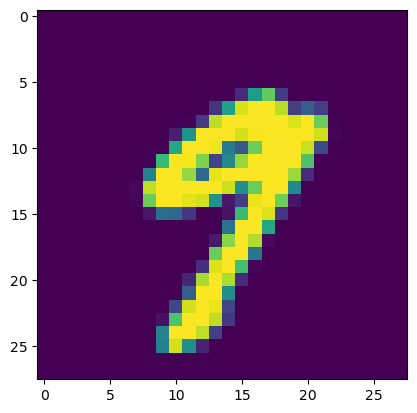

In [19]:
import matplotlib.pyplot as plt
import numpy as np
n=20
plt.imshow(x_test[n])
predicted_value = model.predict(x_test)
print("Predicted Number: ", np.argmax(predicted_value[n]))

